In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart (5).csv')

The objective of this is to predict if the person is having a heart disease by making a decision tree 
on the given dataset.The dependent variable/y is target in which 1 = heart disease and 0 = no heart disease

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: >

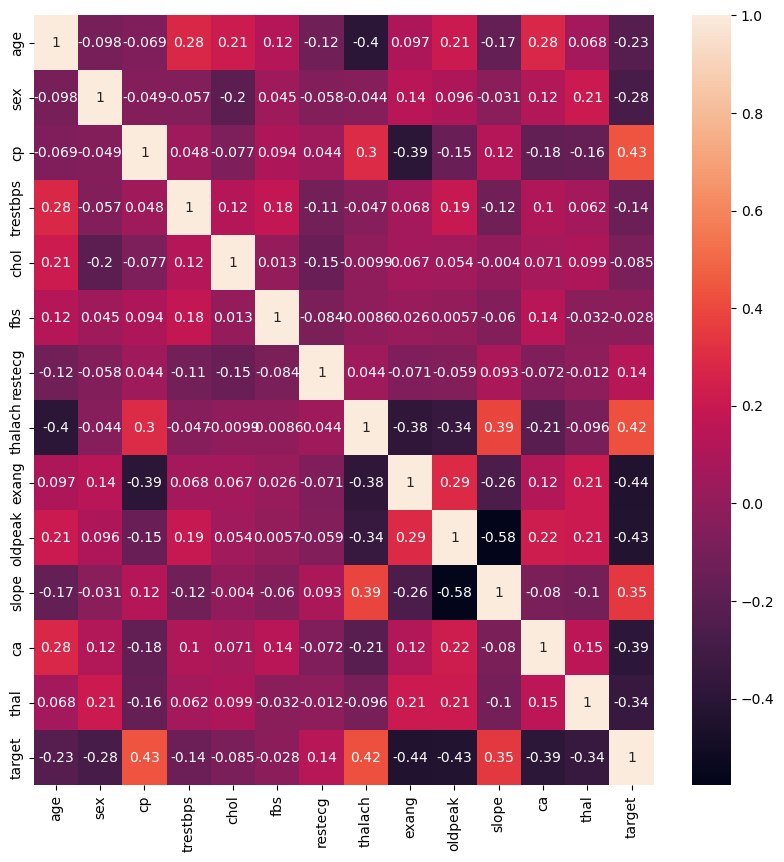

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)

In [8]:
df.describe()
#include = all -  gives all numerical and object column anaysis in describe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.duplicated().sum()

1

In [10]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
df.drop_duplicates(inplace = True,keep = 'first',)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
df.shape

(302, 14)

In [13]:
df.duplicated().sum()

0

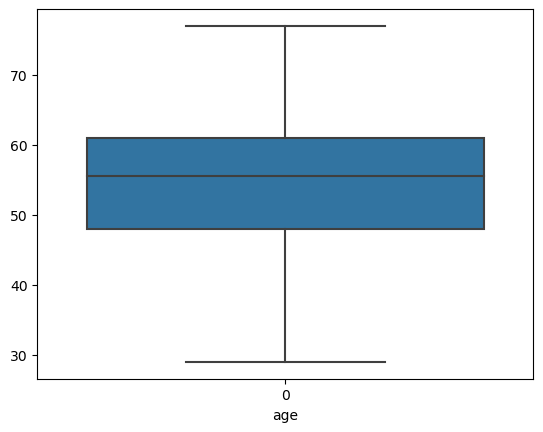

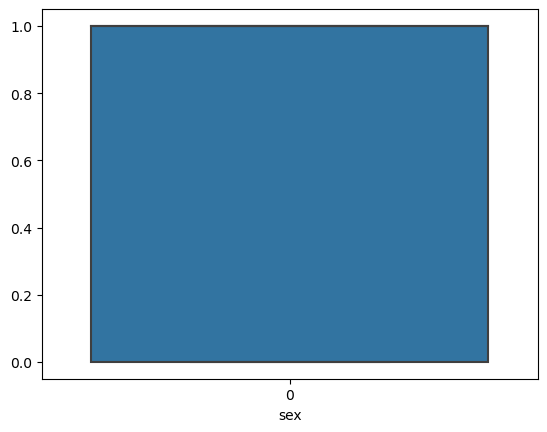

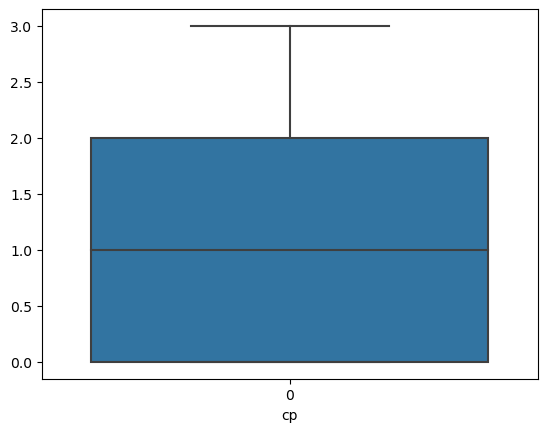

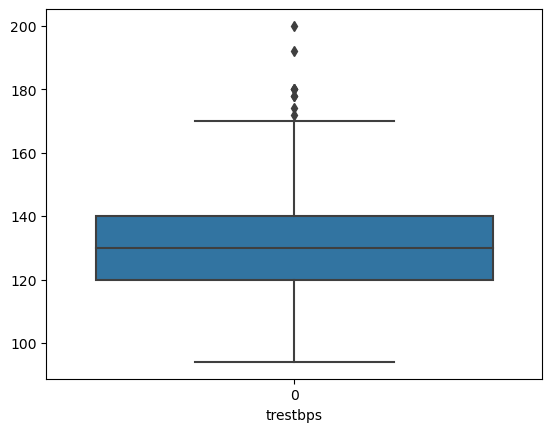

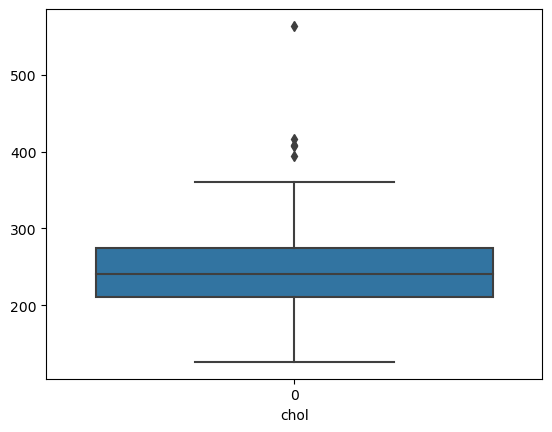

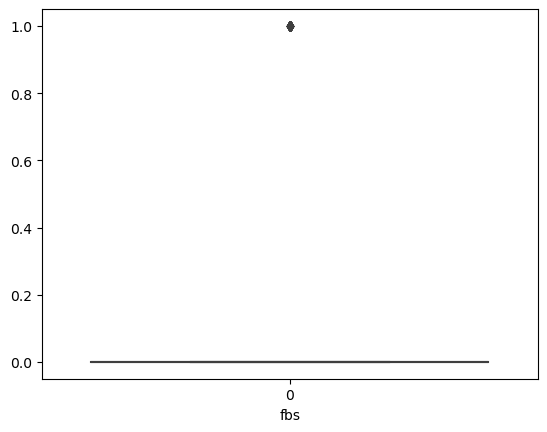

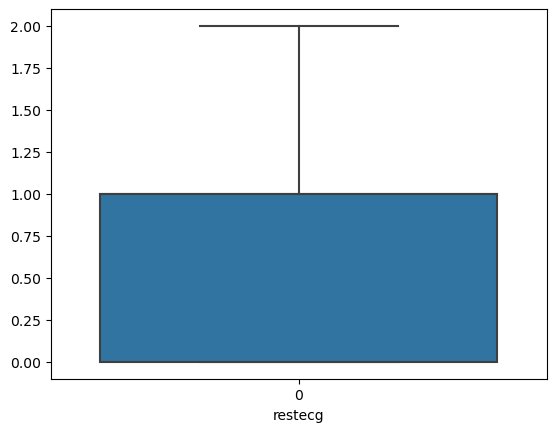

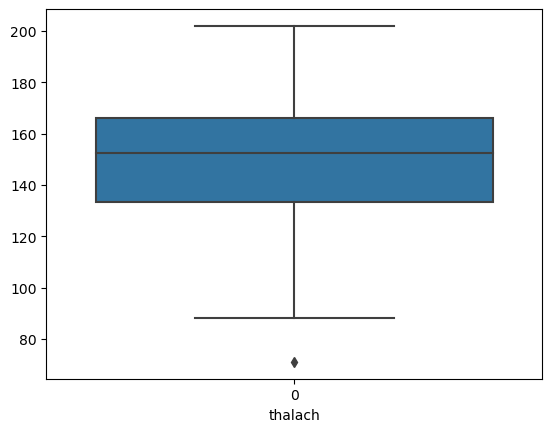

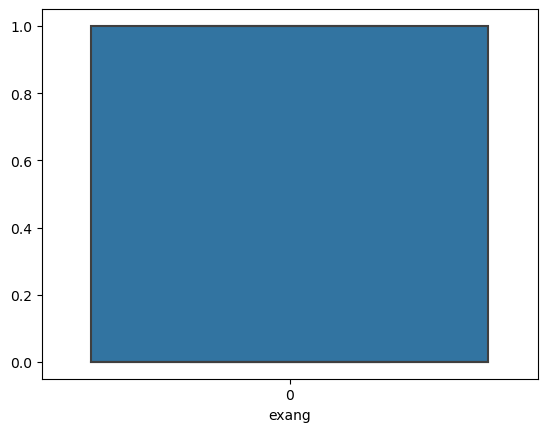

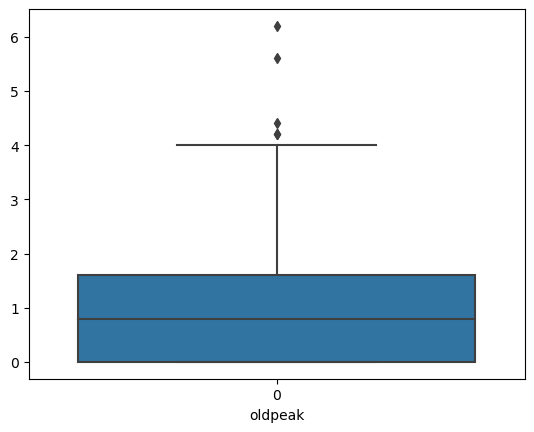

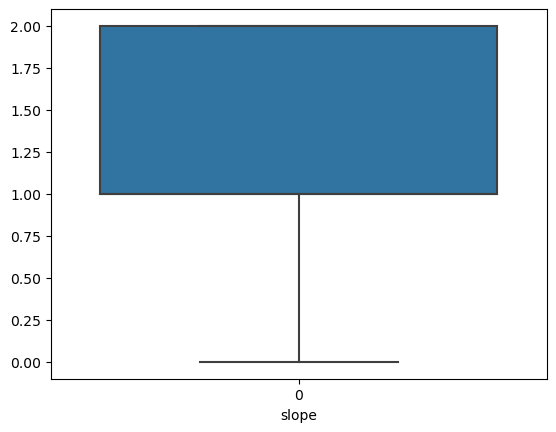

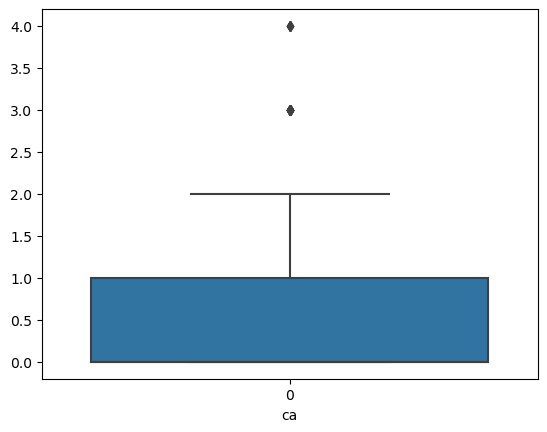

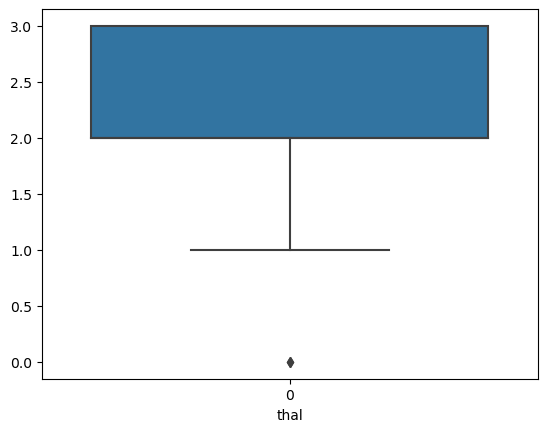

In [14]:
for i in df.columns:
    if  i!= 'target':
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [15]:
q1 = df['trestbps'].quantile(0.25)
q3 = df['trestbps'].quantile(0.75)
q1,q3
iqr = q3-q1
df = df[(df['trestbps']>=q1-1.5*iqr) & (df['trestbps']<=q3+1.5*iqr)]
df.shape

(293, 14)

In [16]:
q1 = df['chol'].quantile(0.25)
q3 = df['chol'].quantile(0.75)
q1,q3
iqr = q3-q1
df = df[(df['chol']>=q1-1.5*iqr) & (df['chol']<=q3+1.5*iqr)]
df.shape

(288, 14)

In [17]:
q1 = df['thalach'].quantile(0.25)
q3 = df['thalach'].quantile(0.75)
q1,q3
iqr = q3-q1
df = df[(df['thalach']>=q1-1.5*iqr) & (df['thalach']<=q3+1.5*iqr)]
df.shape

(287, 14)

In [18]:
q1 = df['oldpeak'].quantile(0.25)
q3 = df['oldpeak'].quantile(0.75)
q1,q3
iqr = q3-q1
df = df[(df['oldpeak']>=q1-1.5*iqr) & (df['oldpeak']<=q3+1.5*iqr)]
df.shape

(283, 14)

In [19]:
'''q1 = df['ca'].quantile(0.25)
q3 = df['ca'].quantile(0.75)
q1,q3
iqr = q3-q1
df = df[(df['ca']>=q1-1.5*iqr) & (df['ca']<=q3+1.5*iqr)]
df.shape'''

"q1 = df['ca'].quantile(0.25)\nq3 = df['ca'].quantile(0.75)\nq1,q3\niqr = q3-q1\ndf = df[(df['ca']>=q1-1.5*iqr) & (df['ca']<=q3+1.5*iqr)]\ndf.shape"

In [20]:
'''q1 = df['thal'].quantile(0.25)
q3 = df['thal'].quantile(0.75)
q1,q3
iqr = q3-q1
df = df[(df['thal']>=q1-1.5*iqr) & (df['thal']<=q3+1.5*iqr)]
df.shape'''

"q1 = df['thal'].quantile(0.25)\nq3 = df['thal'].quantile(0.75)\nq1,q3\niqr = q3-q1\ndf = df[(df['thal']>=q1-1.5*iqr) & (df['thal']<=q3+1.5*iqr)]\ndf.shape"

In [21]:
x = df.drop('target',axis = 1)
x.shape

(283, 13)

In [22]:
x = df.iloc[:,:-1]
x.shape

(283, 13)

In [23]:
y = df['target']

In [24]:
from sklearn.model_selection import train_test_split

In [110]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=12)

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dt = DecisionTreeClassifier()

In [113]:
dr = dt.fit(xtrain,ytrain)

In [114]:
ypred = dt.predict(xtest)

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
confusion_matrix(ytest,ypred)

array([[34,  4],
       [11, 36]], dtype=int64)

In [117]:
from sklearn.metrics import accuracy_score, recall_score

In [118]:
accuracy_score(ytest,ypred)

0.8235294117647058

In [119]:
recall_score(ytest,ypred)

0.7659574468085106

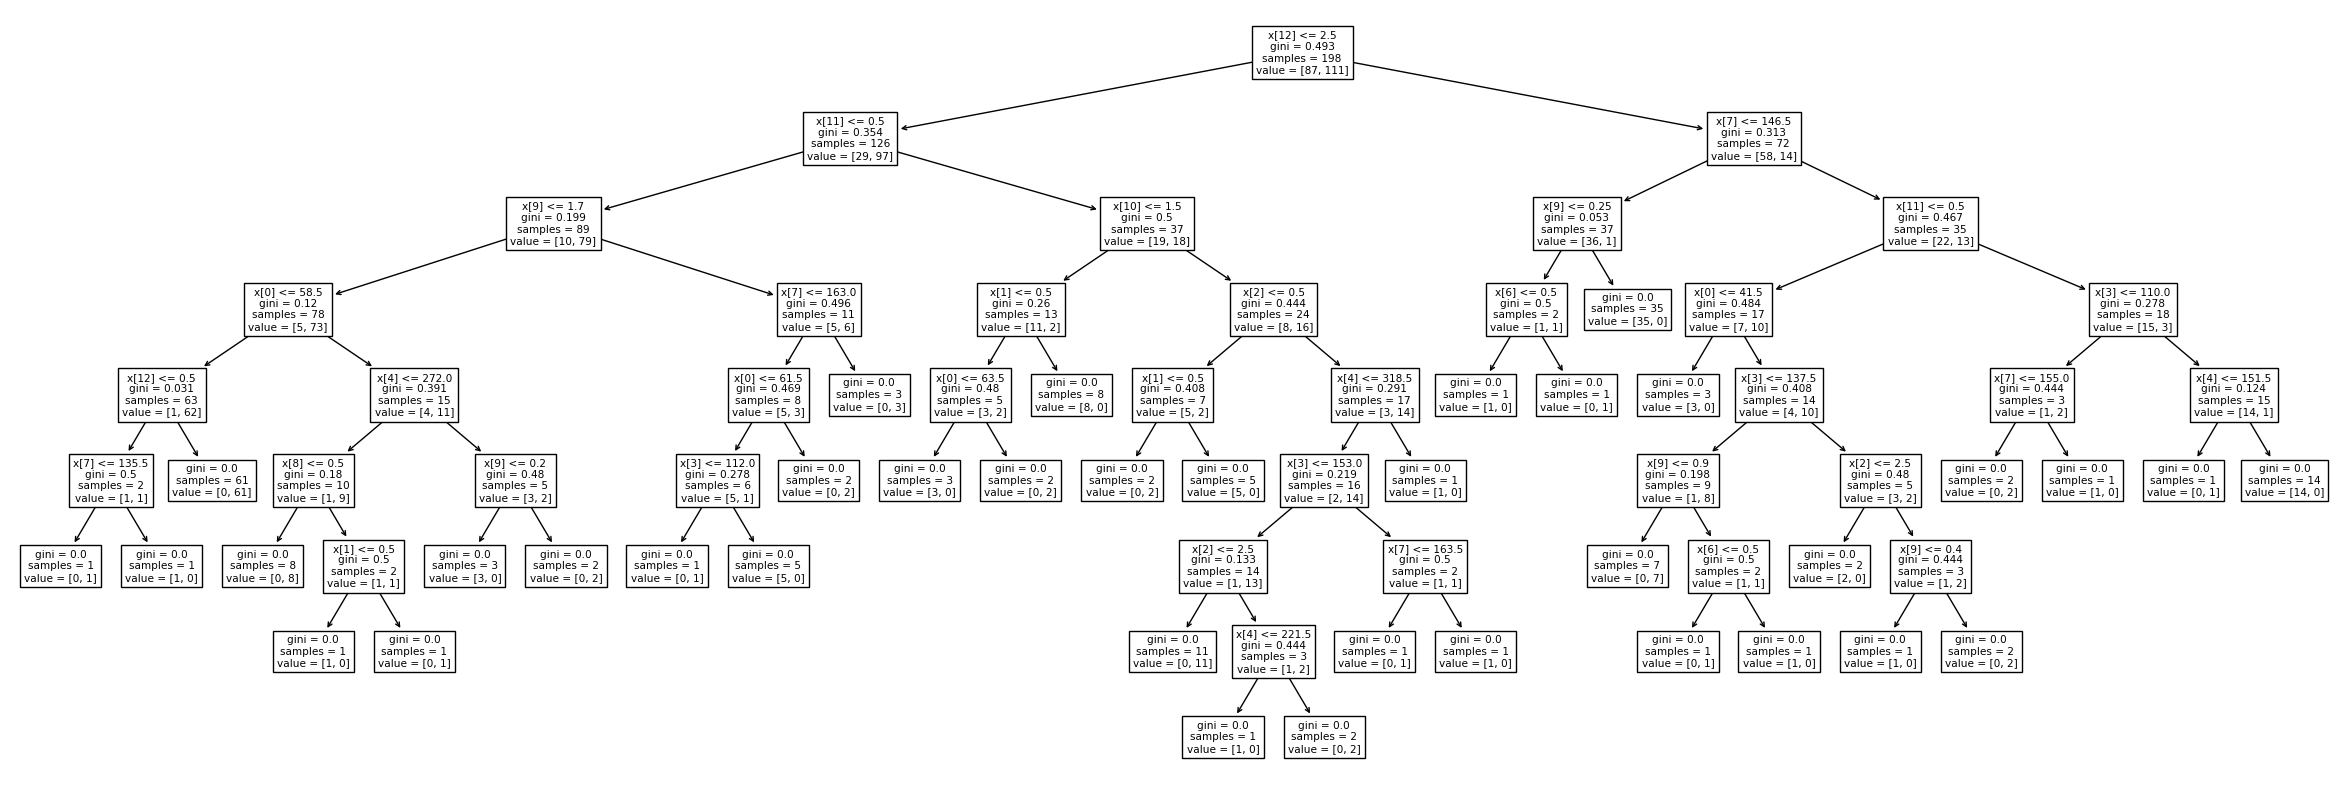

In [120]:
from sklearn import tree
plt.figure(figsize = (30,10))
tree.plot_tree(dr)
plt.show()

In [121]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [122]:
#define hyperparameter grid
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}


In [123]:
grid_search = GridSearchCV(dt,param_grid,cv = 5)
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [124]:
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_
best_params,best_dt

({'criterion': 'entropy',
  'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 DecisionTreeClassifier(criterion='entropy', max_depth=5))

In [125]:
ypred = best_dt.predict(xtest)

In [126]:
accuracy_score(ypred,ytest)

0.9647058823529412

array([0], dtype=int64)